### Assumptions
* There are some dates in the past and in the future

* The dates in the past are for 1979-03-01, I 'm assuming this is a date entry mistake as the data is way back in the past.

* For the future dates I'm assuming its a part of the hazard model or maybe predictions that have been made with respect to the churn date.

* There are some null values in the redeemed columns so we are assuming they used the coupon code if the account creation date falls between the campaign duration.

* We are also assuming that every account or user id that has been created after 2022-02-28 ????

* Also I am assumimg that the campaign we ran was open to all people did see the coupon code but did no choose to signup using it, which will help us detemining the conversion_rate


In [81]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import date

In [82]:
data = pd.read_csv('marketing_analyst_test.csv')
data.head()

,account_id,user_id,redeemed,date_created,date_churned
0,X547595,R6G74BVZGN,N,2022-02-14,2022-11-14
1,X704540,NOQ41G93C5,N,2022-02-14,2022-09-14
2,X704540,5RYIMD2OCJ,N,2022-02-14,2022-09-14
3,X704540,NL77S1PVEU,N,2022-02-14,2022-09-14
4,X704540,RMV8K34NXZ,N,2022-02-14,2022-09-14


In [83]:
df = data.copy()
df.head()

,account_id,user_id,redeemed,date_created,date_churned
0,X547595,R6G74BVZGN,N,2022-02-14,2022-11-14
1,X704540,NOQ41G93C5,N,2022-02-14,2022-09-14
2,X704540,5RYIMD2OCJ,N,2022-02-14,2022-09-14
3,X704540,NL77S1PVEU,N,2022-02-14,2022-09-14
4,X704540,RMV8K34NXZ,N,2022-02-14,2022-09-14


In [84]:
df = df[(df['date_created']>'2022-02-11') & (df['date_created']<'2022-03-17')]

## Total account_ids

In [85]:
total_account_ids = df['account_id'].nunique()
print(f"There are total {total_account_ids} account ids signed up.")

There are total 41128 account ids signed up.


In [86]:
total_user_ids = df['user_id'].nunique()
print(f"There are total {total_user_ids} user ids signed up.")

There are total 167781 user ids signed up.


In [87]:
accounts_with_coupon = df[df['redeemed'] == 'Y']['account_id'].nunique()
print(f"There are {accounts_with_coupon} that were created using coupons.")

There are 13812 that were created using coupons.


In [88]:
accounts_active = df['date_churned'].isna().sum()

print(f"There are {accounts_active} accounts active as of now.")

There are 549 accounts active as of now.


### There are some entries of which date_churned is smaller than the date_created, so inorder to reduce or avoid any bias, I've decided that we edit the year to the concerning cell.

In [96]:
df['date_churned'].replace('2000-08-04','2022-08-04',inplace=True)

## Hypothesis:
#### * Null Hypothesis: After having ran the campaign we will increase the revenue generated and make the retention rate better.
#### * Alternate Hypothesis: There won't be an increase or a significant increase in the revenue and the retention rate.

In [99]:

def calculate_churn_period(df):
    # Convert 'created_date' and 'churn_date' columns to datetime format
    df['date_created'] = pd.to_datetime(df['date_created'], errors='coerce')
    df['date_churned'] = pd.to_datetime(df['date_churned'], errors='coerce')

    # Calculate difference between 'churn_date' and 'created_date' in months
    df['active_months'] = round(((df['date_churned'] - df['date_created']).dt.days / 30.436875).fillna(0))

    return df

df = calculate_churn_period(df)

In [376]:
coupons_used_after_campaign = df[(df['redeemed'] == 'Y') & (df['date_created'] > '2022-02-28')]['account_id'].nunique()
print(f"There are {coupons_used_after_campaign} accounts created with coupons due to the campaign.")

There are 13812 accounts created with coupons due to the campaign.


In [377]:
coupons_not_used_after_campaign = df[(df['redeemed'] == 'N') & (df['date_created'] > '2022-02-28')]['account_id'].nunique()
print(f"There are {coupons_not_used_after_campaign} accounts created without using coupons even during the campaign.")

There are 13983 accounts created without using coupons even during the campaign.


In [378]:
coupons_used_before_campaign = df[(df['redeemed'] == 'Y') & (df['date_created'] < '2022-02-28')]['account_id'].nunique()
print(f"There are {coupons_used_before_campaign} accounts created with coupons before campaign was introduced.")

There are 0 accounts created with coupons before campaign was introduced.


In [379]:
coupons_not_used_before_campaign = df[(df['redeemed'] == 'N') & (df['date_created'] < '2022-02-28')]['account_id'].nunique()
print(f"There are {coupons_not_used_before_campaign} accounts created before the campaign.")

There are 13883 accounts created before the campaign.


## Things to do:
* analyse with nan and not nan values
* frist mach nntr kiti aale
* yes waalyancha churn
* no walyancha churn
* conversion rate


<AxesSubplot:xlabel='active_months'>

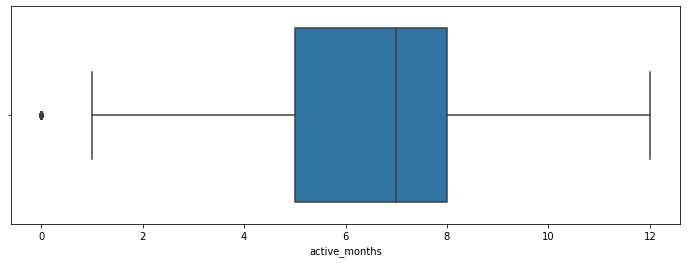

In [337]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['active_months'])

In [106]:
avg_user_age= df['active_months'].mean()
print(f"The average user age before it gets churned is {round(avg_user_age)} months")

The average user age before it gets churned is 7 months


Text(0, 0.5, 'daily users acquired')

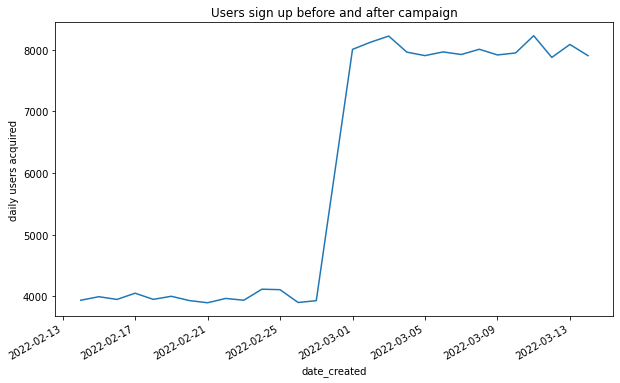

In [143]:
plt.figure(figsize=(10,6))
df.groupby(['date_created'])['user_id'].nunique().plot()
plt.title('Users sign up before and after campaign')
plt.xlabel('date_created')
plt.ylabel('daily users acquired')

Text(0, 0.5, 'Revenue by users churned')

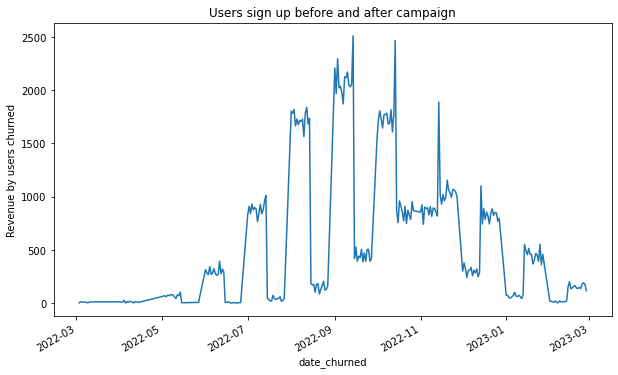

In [304]:
plt.figure(figsize=(10,6))
df.groupby(['date_churned'])['user_id'].nunique().plot()
plt.title('Users sign up before and after campaign')
plt.xlabel('date_churned')
plt.ylabel('Revenue by users churned')

In [108]:
df[df['redeemed'].isna()]

,account_id,user_id,redeemed,date_created,date_churned,active_months
6961,X821881,D121KIKWFB,NaN,2022-02-15,2022-10-15,8.0
33325,X695876,GULLX69NSQ,NaN,2022-02-22,2022-09-22,7.0
41424,X67849,46G3B46AQ1,NaN,2022-02-24,2022-11-24,9.0
77177,X100451,UANUNUGCS7,NaN,2022-03-03,2022-06-03,3.0
82990,X132705,Q3O84NKW8A,NaN,2022-03-04,2022-08-04,5.0
134446,X122845,7N48M1GSTQ,NaN,2022-03-10,2022-09-10,6.0
159758,X876324,19S6DAOVYB,NaN,2022-03-13,2022-10-13,7.0
167512,X14247,WX64ZPEE9X,NaN,2022-03-14,2022-08-14,5.0


In [109]:
df['redeemed'] = df['redeemed'].replace(np.nan,'NAN')

In [110]:
df[df['redeemed']=='NAN']

,account_id,user_id,redeemed,date_created,date_churned,active_months
6961,X821881,D121KIKWFB,NAN,2022-02-15,2022-10-15,8.0
33325,X695876,GULLX69NSQ,NAN,2022-02-22,2022-09-22,7.0
41424,X67849,46G3B46AQ1,NAN,2022-02-24,2022-11-24,9.0
77177,X100451,UANUNUGCS7,NAN,2022-03-03,2022-06-03,3.0
82990,X132705,Q3O84NKW8A,NAN,2022-03-04,2022-08-04,5.0
134446,X122845,7N48M1GSTQ,NAN,2022-03-10,2022-09-10,6.0
159758,X876324,19S6DAOVYB,NAN,2022-03-13,2022-10-13,7.0
167512,X14247,WX64ZPEE9X,NAN,2022-03-14,2022-08-14,5.0


In [111]:
before_date = pd.to_datetime('2022-02-28')

def fill_redeem(colm):
    redeem = colm[0]
    created_date = colm[1]
    if "NAN" in redeem and created_date < before_date:
        redeem='N'
        return redeem
    else: 
        return redeem

df['redeemed'] = df[['redeemed','date_created']].apply(fill_redeem,axis=1)

There are nan values in the the dataframe for the column redeemed indicating if the user chose to signup using the coupon code or not. Now if we just assume that the user_id's signed up during the campaign period were created using the coupon codes and fill in the values accordingly then it'd be a very <b>*biased assumption*</b> in favour of the campaign and thus can make the metric skew a little bit.

So I've decided to put these values aside and proceed with the dataset.

In [375]:
df_1 = df[df['redeemed']!='NAN']
df_1

,account_id,user_id,redeemed,date_created,date_churned,active_months,revenue
0,X547595,R6G74BVZGN,N,2022-02-14,2022-11-14,9.0,27.0
1,X704540,NOQ41G93C5,N,2022-02-14,2022-09-14,7.0,21.0
2,X704540,5RYIMD2OCJ,N,2022-02-14,2022-09-14,7.0,21.0
3,X704540,NL77S1PVEU,N,2022-02-14,2022-09-14,7.0,21.0
4,X704540,RMV8K34NXZ,N,2022-02-14,2022-09-14,7.0,21.0
...,...,...,...,...,...,...,...
167810,X556715,7THM87WUAS,N,2022-03-14,2022-10-14,7.0,21.0
167811,X556715,LQOXYY42V8,N,2022-03-14,2022-10-14,7.0,21.0
167812,X556715,2IWJ1OPPEJ,N,2022-03-14,2022-10-14,7.0,21.0
167813,X556715,ISASLCXDEA,N,2022-03-14,2022-10-14,7.0,21.0


We can't as of now determine if the above mentioned user ids have used the coupon code to or not whereas the ones which were created before the campaign start date I have assumed it that they didn't have access to the coupon.

In [345]:
before_date = pd.to_datetime('2022-02-28')

def revenue_generated(coloms):
    active_months = coloms[0]
    redeemed = coloms[1]
    created_date = coloms[2]
    if active_months <= 3:
        sales = 0
        return sales
    elif redeemed == 'Y' and created_date > before_date:
        sales = (active_months - 3) * 3
        return sales
    elif redeemed == 'N':
        sales = active_months*3
        return sales

df_1['revenue'] = df_1[['active_months','redeemed','date_created']].apply(revenue_generated,axis=1)

/var/folders/xj/yspv_kgs62q2d3qp8q_x3nt00000gr/T/ipykernel_27063/1694033356.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['revenue'] = df_1[['active_months','redeemed','date_created']].apply(revenue_generated,axis=1)


In [346]:
avg_revenue_user = df_1['revenue'].sum()/df_1['user_id'].nunique()
print(f"The average revenue per user is ${round(avg_revenue_user)}.")

The average revenue per user is $18.


In [347]:
df_1[df_1['active_months']<=3]['user_id'].nunique() # 3 mahine and tyachya khaali active 

5870

In [389]:
three_months_and_less = df_1[(df_1['active_months']<=3) & (df_1['redeemed']=='Y')]['user_id'].nunique() # 3 mahine and tyachya khaali active
print(f"There were {three_months_and_less} number of user_id's that were active for less than 3 months so they enjoyed the promotion without being charged a penny.")

There were 2710 number of user_id's that were active for less than 3 months so they enjoyed the promotion without being charged a penny.


In [398]:
avg_revenue_per_user_with_coupon = round(df_1[df_1['redeemed']=='Y']['revenue'].mean(),2) # Dollars
print(f"The average revenue per user who signed up with a coupon is ${avg_revenue_per_user_with_coupon}")

The average revenue per user who signed up with a coupon is $8.99


In [399]:
avg_revenue_per_user_without_coupon = round(df_1[df_1['redeemed']=='N']['revenue'].mean(),2) # Dollars
print(f"The average revenue per user who signed up without a coupon is ${avg_revenue_per_user_without_coupon}")

The average revenue per user who signed up without a coupon is $22.08


In [400]:
avg_active_duration_user_id_with_coupon = round(df_1[df_1['redeemed']=='Y']['active_months'].mean(),2) # Months
print(f"The average duratin for which the user_id is active for a user signed up with coupon is {avg_active_duration_user_id_with_coupon} months")

The average duratin for which the user_id is active for a user signed up with coupon is 5.98 months


In [401]:
avg_active_duration_user_id_without_coupon = round(df_1[df_1['redeemed']=='N']['active_months'].mean(),2) # Months
print(f"The average duratin for which the user_id is active for a user signed up without coupon is {avg_active_duration_user_id_without_coupon} months")

The average duratin for which the user_id is active for a user signed up without coupon is 7.42 months


## Conversion Rate

In [348]:
total_impressions = df_1[df_1['date_created']>'2022-02-28']['account_id'].nunique()
converted_accounts = df_1[(df_1['date_created']>'2022-02-28') & (df_1['redeemed']=='Y')]['account_id'].nunique()
conversion_rate = round((converted_accounts * 100)/total_impressions,2)
print(f"The conversion rate for the accounts created with coupons is {conversion_rate}%.")

The conversion rate for the accounts created with coupons is 50.0%.


## Retention Rates

In [349]:
still_active_users = df_1[df_1['date_churned'].isna()]['user_id'].nunique()
total_users = df_1['user_id'].nunique()
overall_retention_rate = round((still_active_users*100)/total_users,2)
print(f"Overall Retention Rate is {overall_retention_rate}%.")


Overall Retention Rate is 0.33%.


### Retention Rate before campaign

In [350]:
retention_df_before_campaign = df_1[df_1['date_created']<'2022-02-28']
avg_retention_time_before_campaigns = round(retention_df_before_campaign['active_months'].mean())
print(f"The average retention time before the campaign began was 9 months.")

The average retention time before the campaign began was 9 months.


In [351]:
retention_df_before_campaign = df_1[df_1['date_created']<'2022-02-28']
users_active_3_months = retention_df_before_campaign[retention_df_before_campaign['active_months']>3]['user_id'].nunique()
total_users_before_campaign = retention_df_before_campaign['user_id'].nunique()
three_month_retention_before_campaign = round((users_active_3_months*100)/total_users_before_campaign,2)
print(f"Three month Retention Rate before the campaign began is {three_month_retention_before_campaign}%.")


Three month Retention Rate before the campaign began is 99.01%.


In [352]:
retention_df_before_campaign = df_1[df_1['date_created']<'2022-02-28']
users_active_6_months = retention_df_before_campaign[retention_df_before_campaign['active_months']>6]['user_id'].nunique()
total_users_before_campaign = retention_df_before_campaign['user_id'].nunique()
six_month_retention_before_campaign = round((users_active_6_months*100)/total_users_before_campaign,2)
print(f"Six month Retention Rate before the campaign began is {six_month_retention_before_campaign}%.")


Six month Retention Rate before the campaign began is 94.13%.


In [353]:
retention_df_before_campaign = df_1[df_1['date_created']<'2022-02-28']
users_active_9_months = retention_df_before_campaign[retention_df_before_campaign['active_months']>9]['user_id'].nunique()
total_users_before_campaign = retention_df_before_campaign['user_id'].nunique()
nine_month_retention_before_campaign = round((users_active_9_months*100)/total_users_before_campaign,2)
print(f"Nine month Retention Rate before the campaign began is {nine_month_retention_before_campaign}%.")


Nine month Retention Rate before the campaign began is 35.7%.


In [354]:
retention_df_before_campaign = df_1[df_1['date_created']<'2022-02-28']
users_active_12_months = retention_df_before_campaign[retention_df_before_campaign['active_months']>12]['user_id'].nunique()
total_users_before_campaign = retention_df_before_campaign['user_id'].nunique()
twelve_month_retention_before_campaign = round((users_active_12_months*100)/total_users_before_campaign,2)
print(f"Twelve month Retention Rate before the campaign began is {twelve_month_retention_before_campaign}%.")


Twelve month Retention Rate before the campaign began is 0.0%.


### Retention Rate after campaign for users who signed up using coupon

In [358]:
retention_df_after_campaign_coupon = df_1[(df_1['date_created']>'2022-02-28') & (df_1['redeemed']=='Y')]
avg_retention_time_after_campaign_coupon = round(retention_df_after_campaign_coupon['active_months'].mean())
print(f"The average retention time after the campaign and for the users who signed up using a coupon {avg_retention_time_after_campaign_coupon} months.")

The average retention time after the campaign and for the users who signed up using a coupon 6 months.


In [359]:
retention_df_after_campaign = df_1[(df_1['date_created']>'2022-02-28') & (df_1['redeemed']=='Y')]
users_active_3_months = retention_df_after_campaign[retention_df_after_campaign['active_months']>3]['user_id'].nunique()
total_users_after_campaign = retention_df_after_campaign['user_id'].nunique()
three_month_retention_after_campaign = round((users_active_3_months*100)/total_users_before_campaign,2)
print(f"Three month Retention Rate after the campaign began for users who chose the coupon code to signup is {three_month_retention_after_campaign}%.")
    

Three month Retention Rate after the campaign began for users who chose the coupon code to signup is 95.16%.


In [360]:
retention_df_after_campaign = df_1[(df_1['date_created']>'2022-02-28') & (df_1['redeemed']=='Y')]
users_active_6_months = retention_df_after_campaign[retention_df_after_campaign['active_months']>6]['user_id'].nunique()
total_users_after_campaign = retention_df_after_campaign['user_id'].nunique()
six_month_retention_after_campaign = round((users_active_6_months*100)/total_users_before_campaign,2)
print(f"Six month Retention Rate after the campaign began for users who chose the coupon code to signup is {six_month_retention_after_campaign}%.")
    

Six month Retention Rate after the campaign began for users who chose the coupon code to signup is 36.93%.


In [361]:
retention_df_after_campaign = df_1[(df_1['date_created']>'2022-02-28') & (df_1['redeemed']=='Y')]
users_active_9_months = retention_df_after_campaign[retention_df_after_campaign['active_months']>9]['user_id'].nunique()
total_users_after_campaign = retention_df_after_campaign['user_id'].nunique()
nine_month_retention_after_campaign = round((users_active_9_months*100)/total_users_before_campaign,2)
print(f"Nine month Retention Rate after the campaign began for users who chose the coupon code to signup is {nine_month_retention_after_campaign}%.")
    

Nine month Retention Rate after the campaign began for users who chose the coupon code to signup is 0.98%.


In [362]:
retention_df_after_campaign = df_1[(df_1['date_created']>'2022-02-28') & (df_1['redeemed']=='Y')]
users_active_12_months = retention_df_after_campaign[retention_df_after_campaign['active_months']>12]['user_id'].nunique()
total_users_after_campaign = retention_df_after_campaign['user_id'].nunique()
twelve_month_retention_after_campaign = round((users_active_12_months*100)/total_users_before_campaign,2)
print(f"Twelve month Retention Rate after the campaign began for users who chose the coupon code to signup is {twelve_month_retention_after_campaign}%.")
    

Twelve month Retention Rate after the campaign began for users who chose the coupon code to signup is 0.0%.


### Retention Rate after campaign for users who signed up without a coupon

In [363]:
retention_df_after_campaign_with_no_coupon = df_1[(df_1['date_created']>'2022-02-28') & (df_1['redeemed']=='N')]
avg_retention_time_after_campaign_with_no_coupon = round(retention_df_after_campaign_with_no_coupon['active_months'].mean())
print(f"The average retention time after the campaign and for the users who signed up without a coupon {avg_retention_time_after_campaign_with_no_coupon} months.")

The average retention time after the campaign and for the users who signed up without a coupon 6 months.


In [364]:
retention_df_after_campaign_without_coupon = df_1[(df_1['date_created']>'2022-02-28') & (df_1['redeemed']=='N')]
users_active_3_months_without_coupon  = retention_df_after_campaign_without_coupon[retention_df_after_campaign_without_coupon['active_months']>3]['user_id'].nunique()
total_users_after_campaign = retention_df_after_campaign['user_id'].nunique()
three_month_retention_after_campaign_without_coupon  = round((users_active_3_months_without_coupon*100)/total_users_before_campaign,2)
print(f"Three month Retention Rate after the campaign began for users who refrained from choosing the coupon code to signup is {three_month_retention_after_campaign_without_coupon}%.")
    

Three month Retention Rate after the campaign began for users who refrained from choosing the coupon code to signup is 96.53%.


In [365]:
retention_df_after_campaign_without_coupon = df_1[(df_1['date_created']>'2022-02-28') & (df_1['redeemed']=='N')]
users_active_6_months_without_coupon  = retention_df_after_campaign_without_coupon[retention_df_after_campaign_without_coupon['active_months']>6]['user_id'].nunique()
total_users_after_campaign = retention_df_after_campaign['user_id'].nunique()
six_month_retention_after_campaign_without_coupon  = round((users_active_6_months_without_coupon*100)/total_users_before_campaign,2)
print(f"Six month Retention Rate after the campaign began for users who refrained from choosing the coupon code to signup is {six_month_retention_after_campaign_without_coupon}%.")
    

Six month Retention Rate after the campaign began for users who refrained from choosing the coupon code to signup is 37.3%.


In [366]:
retention_df_after_campaign_without_coupon = df_1[(df_1['date_created']>'2022-02-28') & (df_1['redeemed']=='N')]
users_active_9_months_without_coupon  = retention_df_after_campaign_without_coupon[retention_df_after_campaign_without_coupon['active_months']>9]['user_id'].nunique()
total_users_after_campaign = retention_df_after_campaign['user_id'].nunique()
nine_month_retention_after_campaign_without_coupon  = round((users_active_9_months_without_coupon*100)/total_users_before_campaign,2)
print(f"Nine month Retention Rate after the campaign began for users who refrained from choosing the coupon code to signup is {nine_month_retention_after_campaign_without_coupon}%.")
    

Nine month Retention Rate after the campaign began for users who refrained from choosing the coupon code to signup is 1.02%.


In [367]:
retention_df_after_campaign_without_coupon = df_1[(df_1['date_created']>'2022-02-28') & (df_1['redeemed']=='N')]
users_active_12_months_without_coupon  = retention_df_after_campaign_without_coupon[retention_df_after_campaign_without_coupon['active_months']>12]['user_id'].nunique()
total_users_after_campaign = retention_df_after_campaign['user_id'].nunique()
twelve_month_retention_after_campaign_without_coupon  = round((users_active_12_months_without_coupon*100)/total_users_before_campaign,2)
print(f"Twelve month Retention Rate after the campaign began for users who refrained from choosing the coupon code to signup is {twelve_month_retention_after_campaign_without_coupon}%.")
    

Twelve month Retention Rate after the campaign began for users who refrained from choosing the coupon code to signup is 0.0%.


Text(0.5, 1.0, 'Retention Rate for users with coupon vs without coupons')

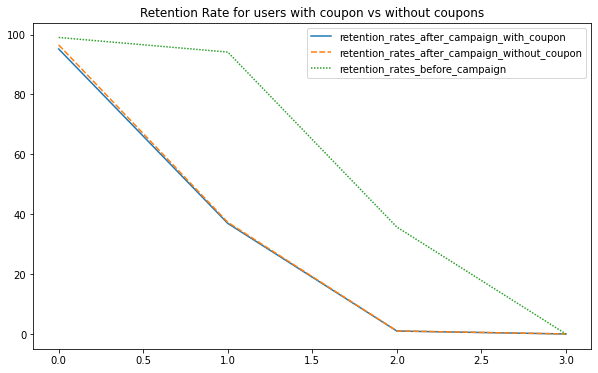

In [368]:
d = {
    'retention_by_month': ['Three Month', 'Six Month', 'Nine Month', 'Twelve Month'] , 
    'retention_rates_after_campaign_with_coupon': [three_month_retention_after_campaign, six_month_retention_after_campaign ,
                               nine_month_retention_after_campaign , twelve_month_retention_after_campaign],
    'retention_rates_after_campaign_without_coupon': [three_month_retention_after_campaign_without_coupon, six_month_retention_after_campaign_without_coupon,
                               nine_month_retention_after_campaign_without_coupon, twelve_month_retention_after_campaign_without_coupon],
    'retention_rates_before_campaign': [three_month_retention_before_campaign, six_month_retention_before_campaign,
                              nine_month_retention_before_campaign, twelve_month_retention_before_campaign]
    }

retention_df = pd.DataFrame(data=d)

plt.figure(figsize=(10,6))
sns.lineplot(data=retention_df[['retention_rates_after_campaign_with_coupon','retention_rates_after_campaign_without_coupon','retention_rates_before_campaign']])
plt.title('Retention Rate for users with coupon vs without coupons')


We can see that the curve for the users who singed in with coupon or without coupon is pretty much the same when chosen for the date after the campaign began, whereas the curve for the people signed up before the campaign is better 

#### This means the retention rate for the users who signed in before the campaign tend to stay longed than the ones who signed in with coupons

<AxesSubplot:xlabel='date_churned', ylabel='revenue'>

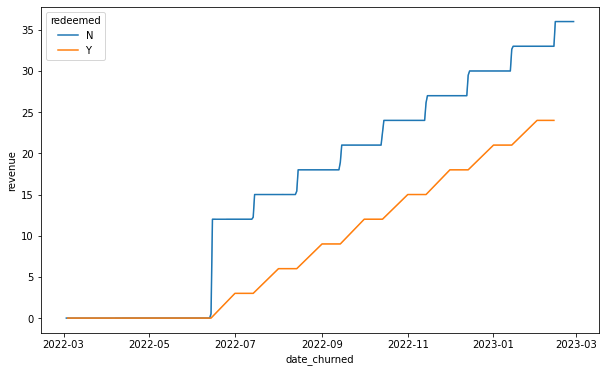

In [369]:
plt.figure(figsize=(10,6))
sns.lineplot(x='date_churned',y='revenue',data=df_1,hue='redeemed')

In [370]:
average_monthly_revenue_before_campaign_df = df_1[df_1['date_created']<'2022-02-28']
average_monthly_revenue_before_campaign_df = average_monthly_revenue_before_campaign_df.groupby('date_created')['revenue'].sum()
average_monthly_revenue_before_campaign_df = round(average_monthly_revenue_before_campaign_df.mean())
average_monthly_revenue_before_campaign_df

105771

In [371]:
average_monthly_revenue_after_campaign_df = df_1[(df_1['date_created']>'2022-02-28') & (df_1['redeemed']=='Y')]
average_monthly_revenue_after_campaign_df = average_monthly_revenue_after_campaign_df.groupby('date_created')['revenue'].sum()
average_monthly_revenue_after_campaign_df = round(average_monthly_revenue_after_campaign_df.mean())
average_monthly_revenue_after_campaign_df

35775

In [372]:
average_monthly_revenue_after_campaign_df_N = df_1[(df_1['date_created']>'2022-02-28') & (df_1['redeemed']=='N')]
average_monthly_revenue_after_campaign_df_N = average_monthly_revenue_after_campaign_df_N.groupby('date_created')['revenue'].sum()
average_monthly_revenue_after_campaign_df_N = round(average_monthly_revenue_after_campaign_df_N.mean())
average_monthly_revenue_after_campaign_df_N

70965

In [373]:
percent_increase = round(1-(average_monthly_revenue_before_campaign_df)/
                         (average_monthly_revenue_after_campaign_df + average_monthly_revenue_after_campaign_df_N),4)
percent_increase

0.0091

###### As we can see the average revenue before the campaign and after the campaign did increase but by barest of margin (0.0091%) so the hypothesis that we had of enabling the campaign to increase the revenue and thus retention has not been fulfilled and this the campaign is not a success.

### There are a certain reasons which might be possible of why certain things took place as they did:
* People did not opt ot choose for the signup with coupon is to get the coupon there would a registartion process in place.
* Also it might be possible that the process inplace might be a bit long which maybe annoyed customers.
* People weren't willing to sign up as they might have a notion of getting their inbox bombarded with emails.
* People who signed up before the campaing began tend ot stay longer as compared to the customers acquired from the campaign maybe they may be getting different service.
* Maybe the load on the site (technical issues) was not so bad until after campaign began as we saw a count of the account_ids or user_ids doubled.
* As we saw a rise in the user count to make the experience easy for customers we made some changes and the customers didn't like them.
* It might also be possible that the customer service that we initially had with lesser number of customers was performing efficiently but when suddenly the count of the user_id rose then they were overwhelmed by the load and couldn't manage it resulting in a not so good customer service.

